## 이미지인식 (CNN)

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"학습셋 이미지 수: {X_train.shape[0]}개")
print(f"테스트셋 이미지 수: {X_test.shape[0]}개")

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


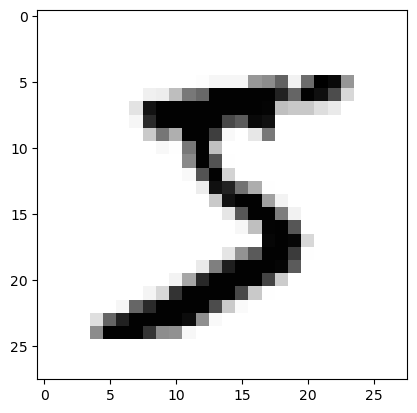

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [5]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

X_train = X_train / 255
X_test = X_test / 255

In [7]:
print(f"class: {y_train[0]}")

class: 5


In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 이미지 인식 과정

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


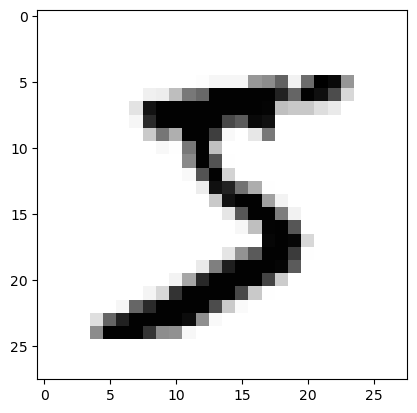

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [10]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.utils import to_categorical

#MNIST 데이터셋을 불러와 학습셋과 데이터셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어있는지 확인.
print(f"학습셋 이미지 수: {X_train.shape[0]}개")
print(f"테스트셋 이미지 수: {X_test.shape[0]}개")

# 첫번째 이미지 확인
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

# 이미지가 인식되는 원리를 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

# 차원 변환
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

X_train = X_train / 255
X_test = X_test / 255

# 클래스 값 확인
print(f"class: {y_train[0]}")

# 바이너리화 과정 실습
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])


### 이미지 손글씨 인식하기: 기본 프레임

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

modelpath = './MNUST_MLP.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [40]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs =30, batch_size=200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print()
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18211, saving model to ./MNUST_MLP.keras

Epoch 2: val_loss improved from 0.18211 to 0.13223, saving model to ./MNUST_MLP.keras

Epoch 3: val_loss improved from 0.13223 to 0.11012, saving model to ./MNUST_MLP.keras

Epoch 4: val_loss improved from 0.11012 to 0.09652, saving model to ./MNUST_MLP.keras

Epoch 5: val_loss improved from 0.09652 to 0.09309, saving model to ./MNUST_MLP.keras

Epoch 6: val_loss improved from 0.09309 to 0.08884, saving model to ./MNUST_MLP.keras

Epoch 7: val_loss improved from 0.08884 to 0.08215, saving model to ./MNUST_MLP.keras

Epoch 8: val_loss improved from 0.08215 to 0.08160, saving model to ./MNUST_MLP.keras

Epoch 9: val_loss did not improve from 0.08160

Epoch 10: val_loss improved from 0.08160 to 0.08122, saving model to ./MNUST_MLP.keras

Epoch 11: val_loss improved from 0.08122 to 0.07963, saving model to ./MNUST_MLP.keras

Epoch 12: val_loss did not improve from 0.07963

Epoch 13: val_loss did not improve

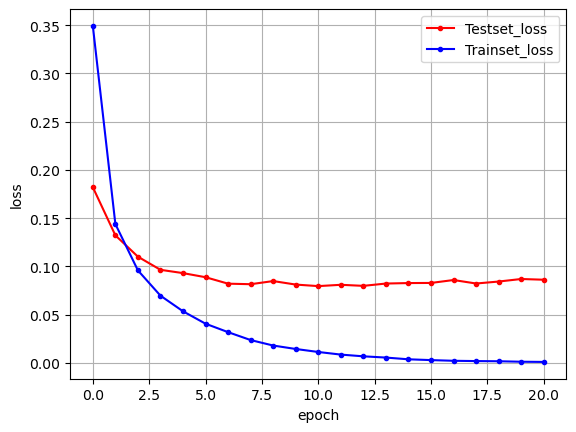

In [41]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker ='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker ='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Convolution layer 로 구성한 모델 생성

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

modelpath = './MNUST_MLP.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [62]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs =30, batch_size=200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print()
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08489, saving model to ./MNUST_MLP.keras

Epoch 2: val_loss improved from 0.08489 to 0.06061, saving model to ./MNUST_MLP.keras

Epoch 3: val_loss improved from 0.06061 to 0.05090, saving model to ./MNUST_MLP.keras

Epoch 4: val_loss improved from 0.05090 to 0.04746, saving model to ./MNUST_MLP.keras

Epoch 5: val_loss improved from 0.04746 to 0.04064, saving model to ./MNUST_MLP.keras

Epoch 6: val_loss did not improve from 0.04064

Epoch 7: val_loss did not improve from 0.04064

Epoch 8: val_loss did not improve from 0.04064

Epoch 9: val_loss did not improve from 0.04064

Epoch 10: val_loss did not improve from 0.04064

Epoch 11: val_loss did not improve from 0.04064

Epoch 12: val_loss did not improve from 0.04064

Epoch 13: val_loss did not improve from 0.04064

Epoch 14: val_loss did not improve from 0.04064

Epoch 15: val_loss improved from 0.04064 to 0.04032, saving model to ./MNUST_MLP.keras

Epoch 16: val_loss did not improve from 0.0

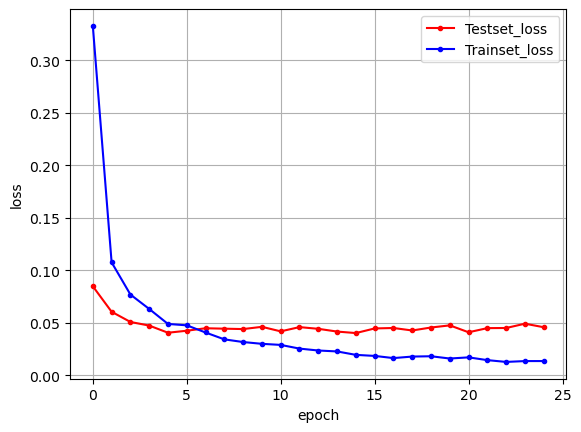

In [63]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker ='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker ='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()